In [1]:
!pip install pydot

In [2]:
!pip install graphviz

In [ ]:
#!conda install python-graphviz

In [3]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
import graphviz

In [4]:
# Criando o dataset
instancias = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'}
]

In [5]:
# Transformando o Ddicionário em DataFrame
df = pd.DataFrame(instancias)

In [6]:
df

,Especie,Melhor Amigo
0,Cachorro,False
1,Cachorro,True
2,Gato,True
3,Gato,True
4,Gato,False
5,Gato,True
6,Gato,True
7,Cachorro,False
8,Gato,True
9,Cachorro,False


In [7]:
# Preparando os dados de treino e de teste
X_train = [[1] if a else [0] for a in df['Melhor Amigo']]
y_train = [1 if d == 'Cachorro' else 0 for d in df['Especie']]
labels = ['Melhor Amigo']

In [8]:
print(X_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [9]:
print(y_train)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [10]:
# Construindo o Classificador Baseado em Entropia
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v1 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [11]:
# Apresentando os dados ao Classificador
modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/Users/rodrigo.abreu/Documents/AtividadesCientistaDeDados/Machine Learning/Cap09 - Decision Treee, Random Forest e Métodos Ensemble - II/Python/tree_modelo_v1.dot'

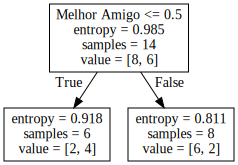

In [13]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
!dot -Tpng tree_modelo_v1.dot -o tree_modelo_v1.png

In [15]:
# Construindo o Classificador Baseado no índice Gini
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v2 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [16]:
# Apresentando os dados ao Classificador
modelo_v2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/Users/rodrigo.abreu/Documents/AtividadesCientistaDeDados/Machine Learning/Cap09 - Decision Treee, Random Forest e Métodos Ensemble - II/Python/tree_modelo_v2.dot'

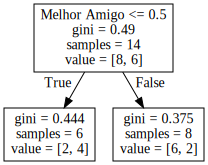

In [18]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v2, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [19]:
!dot -Tpng tree_modelo_v2.dot -o tree_modelo_v2.png